In [1]:
import pandas as pd
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.compose import ColumnTransformer
import keras

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

import os

import math


from tensorflow.keras.utils import Sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import datetime as dt

import warnings
warnings.filterwarnings('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)  # turn off deprecation warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


2023-04-23 22:02:10.588714: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-23 22:02:10.652638: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-23 22:02:10.653965: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 22:02:11.610580: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Prepare Data

In [2]:
df = pd.read_csv('../../../data/latest_minute_final_ada.csv')

In [3]:
df

,Unnamed: 0,datetime,open,high,low,close,volume,close_time,qav,num_trades,...,macd_diff,macd_signal,mi,sma,wma,stc,trix,vi_pos,vi_neg,DATE
0,1798,1641121080000,1.3620,1.3630,1.3620,1.3630,3137.4,1641121139999,4274.95610,31,...,0.000574,0.000477,119.524462,1.359417,1.357818,99.218798,0.001200,1.069767,0.953488,2022-01-02
1,1799,1641121140000,1.3620,1.3630,1.3600,1.3610,119782.1,1641121199999,163062.21100,175,...,0.000519,0.000551,119.649105,1.359467,1.357843,99.609399,0.001199,1.022727,0.954545,2022-01-02
2,1800,1641121200000,1.3610,1.3620,1.3600,1.3600,22013.3,1641121259999,29963.17170,68,...,0.000426,0.000611,119.746935,1.359517,1.357863,99.463083,0.001198,1.022222,0.955556,2022-01-02
3,1801,1641121260000,1.3610,1.3620,1.3600,1.3610,59886.4,1641121319999,81500.97360,109,...,0.000388,0.000667,119.822475,1.359583,1.357889,99.731541,0.001197,1.021739,0.956522,2022-01-02
4,1802,1641121320000,1.3610,1.3630,1.3610,1.3620,18960.8,1641121379999,25825.17710,69,...,0.000395,0.000723,119.947903,1.359667,1.357919,99.865771,0.001196,1.042553,0.936170,2022-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681904,687486,1682267100000,0.3853,0.3856,0.3853,0.3855,43142.9,1682267159999,16628.15496,58,...,0.000219,-0.001512,123.674117,0.384943,0.388146,99.080837,-0.000492,0.977444,0.992481,2023-04-23
681905,687487,1682267160000,0.3855,0.3858,0.3854,0.3858,9896.9,1682267219999,3816.64933,103,...,0.000247,-0.001476,123.702030,0.384958,0.388126,99.540418,-0.000497,1.000000,0.954887,2023-04-23
681906,687488,1682267220000,0.3857,0.3859,0.3857,0.3858,17935.8,1682267279999,6920.09734,25,...,0.000269,-0.001438,123.686660,0.384973,0.388107,99.770209,-0.000501,1.000000,0.954887,2023-04-23
681907,687489,1682267280000,0.3859,0.3862,0.3858,0.3862,41410.7,1682267339999,15983.85534,50,...,0.000301,-0.001395,123.728593,0.384993,0.388090,99.885105,-0.000506,1.030075,0.924812,2023-04-23


In [4]:

df.drop(columns=['Unnamed: 0','datetime','DATE'], inplace=True)
df

,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,...,macd,macd_diff,macd_signal,mi,sma,wma,stc,trix,vi_pos,vi_neg
0,1.3620,1.3630,1.3620,1.3630,3137.4,1641121139999,4274.95610,31,1817.3,2476.97990,...,0.001050,0.000574,0.000477,119.524462,1.359417,1.357818,99.218798,0.001200,1.069767,0.953488
1,1.3620,1.3630,1.3600,1.3610,119782.1,1641121199999,163062.21100,175,19725.4,26850.47080,...,0.001069,0.000519,0.000551,119.649105,1.359467,1.357843,99.609399,0.001199,1.022727,0.954545
2,1.3610,1.3620,1.3600,1.3600,22013.3,1641121259999,29963.17170,68,9362.9,12748.19650,...,0.001037,0.000426,0.000611,119.746935,1.359517,1.357863,99.463083,0.001198,1.022222,0.955556
3,1.3610,1.3620,1.3600,1.3610,59886.4,1641121319999,81500.97360,109,35005.5,47643.13250,...,0.001055,0.000388,0.000667,119.822475,1.359583,1.357889,99.731541,0.001197,1.021739,0.956522
4,1.3610,1.3630,1.3610,1.3620,18960.8,1641121379999,25825.17710,69,15625.8,21284.65060,...,0.001118,0.000395,0.000723,119.947903,1.359667,1.357919,99.865771,0.001196,1.042553,0.936170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681904,0.3853,0.3856,0.3853,0.3855,43142.9,1682267159999,16628.15496,58,15352.2,5916.87593,...,-0.001293,0.000219,-0.001512,123.674117,0.384943,0.388146,99.080837,-0.000492,0.977444,0.992481
681905,0.3855,0.3858,0.3854,0.3858,9896.9,1682267219999,3816.64933,103,8941.1,3448.06893,...,-0.001229,0.000247,-0.001476,123.702030,0.384958,0.388126,99.540418,-0.000497,1.000000,0.954887
681906,0.3857,0.3859,0.3857,0.3858,17935.8,1682267279999,6920.09734,25,10350.8,3993.49563,...,-0.001170,0.000269,-0.001438,123.686660,0.384973,0.388107,99.770209,-0.000501,1.000000,0.954887
681907,0.3859,0.3862,0.3858,0.3862,41410.7,1682267339999,15983.85534,50,38280.2,14775.97768,...,-0.001094,0.000301,-0.001395,123.728593,0.384993,0.388090,99.885105,-0.000506,1.030075,0.924812


In [5]:
scaler = MinMaxScaler()


# Fit the scaler on your dataframe (let's say it's called df)
df_normalized = scaler.fit_transform(df)

# Convert the normalized data back to a dataframe
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

In [6]:

# Convert the DataFrame to a NumPy array
raw_data = df_normalized.values
close = df_normalized['close'].values
close = close.reshape((len(close),1))
# Display the NumPy array
print(type(raw_data))
print(raw_data.shape)
print(close.shape)

<class 'numpy.ndarray'>
(681909, 74)
(681909, 1)


# Prepare Model

In [7]:
print('Prep Data')
num_train_samples = int(0.6 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)


Prep Data
num_train_samples: 409145
num_val_samples: 170477
num_test_samples: 102287


In [8]:
# Set Parameters

# delay: time in future that will be predicted
delay = 6 * 60


# sampling rate: period between timesteps within the sequence
# Sequence with rate=1 : t1,t2...tn
# Sequence with rate=3 : t1,t3...tn*3
sampling_rate = 20

# sequence length: sequence lenght of each sample
half_day = 12 * 60
sequence_length = int(5 * half_day / sampling_rate)


# sequence_stride: period between sequences
# First sequence starts at t0
# Second sequence will start at t1 with sequence_stride=1 or at t5 with sequence_stride=5
sequence_stride = 5

#batch_size: Number of timeseries samples in each batch (except maybe the last one). 
#If None, the data will not be batched (the dataset will yield individual samples).
# Huge impact in performance.
# Tip, should be multiple of 8
batch_size = 32

# Understanding our parameters
msg = f"The timeseries will consist of batches containing {batch_size} sequences of {sequence_length} samples."

msg += f"\nFinally our target is {delay} timesteps in the future, and will have data from {sequence_length * sampling_rate} timesteps in the past"
print(msg)

The timeseries will consist of batches containing 32 sequences of 180 samples.
Finally our target is 360 timesteps in the future, and will have data from 3600 timesteps in the past


In [9]:
train_dataset = keras.preprocessing.timeseries_dataset_from_array(
                        raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=batch_size,
                    start_index=0,
                    end_index=num_train_samples)

print("Done Train")

val_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples)

print("Done Validation")      

test_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=sampling_rate,
                    sequence_stride=sequence_stride,
                    sequence_length=sequence_length,
                    shuffle=False,
                    seed=33,
                    batch_size=batch_size,
                    start_index=num_train_samples + num_val_samples)

print("Done Test")

2023-04-23 22:02:23.363658: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 242213840 exceeds 10% of free system memory.
2023-04-23 22:02:23.712828: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 100922384 exceeds 10% of free system memory.


Done Train
Done Validation
Done Test


# Build and Train Model

In [10]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32)(inputs) 


outputs = layers.Dense(3)(x) #simoidal #con n clases neurnas y funcion softmax
model = keras.Model(inputs, outputs)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

callbacks = [
    keras.callbacks.ModelCheckpoint("models/lstm",
   save_best_only=True) 
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=30,
                    validation_data=val_dataset,
                    callbacks=[callbacks, early_stopping])


2023-04-23 22:02:24.127280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-23 22:02:24.128999: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-23 22:02:24.130377: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30


2023-04-23 22:02:24.419019: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [81110]
	 [[{{node Placeholder/_28}}]]
2023-04-23 22:02:24.419842: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-04-23 22:02:24.795091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int

2535/2535 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0194

2023-04-23 22:04:43.616434: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 100922384 exceeds 10% of free system memory.
2023-04-23 22:04:43.714009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [170477,74]
	 [[{{node Placeholder/_0}}]]
2023-04-23 22:04:43.714584: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [170477,1]
	 [[{{node Placeholder/_20}}]]
2023-04-23 22:04:44.062980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an er

2535/2535 [==============================] - 161s 63ms/step - loss: 0.0020 - mae: 0.0194 - val_loss: 0.0041 - val_mae: 0.0530
Epoch 2/30
2534/2535 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0114

2023-04-23 22:07:42.179063: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-23 22:07:42.180993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-23 22:07:42.182432: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2535/2535 [==============================] - 160s 63ms/step - loss: 0.0012 - mae: 0.0114 - val_loss: 0.0026 - val_mae: 0.0413
Epoch 3/30
2535/2535 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0107

2023-04-23 22:10:23.068896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-23 22:10:23.070985: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-23 22:10:23.072413: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2535/2535 [==============================] - 161s 63ms/step - loss: 0.0012 - mae: 0.0107 - val_loss: 0.0019 - val_mae: 0.0354
Epoch 4/30
2535/2535 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0102

2023-04-23 22:13:06.307179: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-23 22:13:06.309215: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-23 22:13:06.310694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2535/2535 [==============================] - 163s 64ms/step - loss: 0.0010 - mae: 0.0102 - val_loss: 0.0013 - val_mae: 0.0297
Epoch 5/30
2535/2535 [==============================] - ETA: 0s - loss: 8.3800e-04 - mae: 0.0096

2023-04-23 22:15:46.682461: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-23 22:15:46.684212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-23 22:15:46.685627: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2535/2535 [==============================] - 160s 63ms/step - loss: 8.3800e-04 - mae: 0.0096 - val_loss: 0.0013 - val_mae: 0.0296
Epoch 6/30
2534/2535 [============================>.] - ETA: 0s - loss: 6.7194e-04 - mae: 0.0091

2023-04-23 22:18:27.405976: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-23 22:18:27.407798: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-23 22:18:27.409284: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2535/2535 [==============================] - 161s 63ms/step - loss: 6.7176e-04 - mae: 0.0091 - val_loss: 0.0010 - val_mae: 0.0267
Epoch 7/30
2535/2535 [==============================] - ETA: 0s - loss: 5.5432e-04 - mae: 0.0088

2023-04-23 22:21:08.043339: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-23 22:21:08.045402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-23 22:21:08.046916: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2535/2535 [==============================] - 161s 64ms/step - loss: 5.5432e-04 - mae: 0.0088 - val_loss: 8.8427e-04 - val_mae: 0.0248
Epoch 8/30
2534/2535 [============================>.] - ETA: 0s - loss: 4.6529e-04 - mae: 0.0085

2023-04-23 22:23:47.640740: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-23 22:23:47.642475: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-23 22:23:47.643951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2535/2535 [==============================] - 159s 63ms/step - loss: 4.6516e-04 - mae: 0.0085 - val_loss: 7.5841e-04 - val_mae: 0.0231
Epoch 9/30
2534/2535 [============================>.] - ETA: 0s - loss: 4.0606e-04 - mae: 0.0083

2023-04-23 22:26:27.076079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-23 22:26:27.078193: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-23 22:26:27.079647: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2535/2535 [==============================] - 160s 63ms/step - loss: 4.0595e-04 - mae: 0.0083 - val_loss: 6.9476e-04 - val_mae: 0.0222
Epoch 10/30
2535/2535 [==============================] - ETA: 0s - loss: 3.5233e-04 - mae: 0.0081

2023-04-23 22:29:13.226302: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-23 22:29:13.228060: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-23 22:29:13.229529: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2535/2535 [==============================] - 166s 65ms/step - loss: 3.5233e-04 - mae: 0.0081 - val_loss: 6.5884e-04 - val_mae: 0.0217
Epoch 11/30
2534/2535 [============================>.] - ETA: 0s - loss: 2.9565e-04 - mae: 0.0080

2023-04-23 22:31:54.608383: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-23 22:31:54.610319: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-23 22:31:54.611832: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2535/2535 [==============================] - 161s 64ms/step - loss: 2.9557e-04 - mae: 0.0080 - val_loss: 5.9469e-04 - val_mae: 0.0207
Epoch 12/30
2535/2535 [==============================] - ETA: 0s - loss: 2.5731e-04 - mae: 0.0078

2023-04-23 22:34:33.778794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-23 22:34:33.780569: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-23 22:34:33.782079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2535/2535 [==============================] - 160s 63ms/step - loss: 2.5731e-04 - mae: 0.0078 - val_loss: 5.4405e-04 - val_mae: 0.0198
Epoch 13/30
2535/2535 [==============================] - ETA: 0s - loss: 2.2045e-04 - mae: 0.0076

2023-04-23 22:37:14.764368: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-23 22:37:14.766460: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-23 22:37:14.767913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2535/2535 [==============================] - 161s 63ms/step - loss: 2.2045e-04 - mae: 0.0076 - val_loss: 4.8618e-04 - val_mae: 0.0188
Epoch 14/30
2534/2535 [============================>.] - ETA: 0s - loss: 1.9398e-04 - mae: 0.0075

2023-04-23 22:39:54.491764: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-23 22:39:54.493609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-23 22:39:54.495071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2535/2535 [==============================] - 160s 63ms/step - loss: 1.9392e-04 - mae: 0.0075 - val_loss: 4.1327e-04 - val_mae: 0.0174
Epoch 15/30
2535/2535 [==============================] - ETA: 0s - loss: 1.7106e-04 - mae: 0.0073

2023-04-23 22:42:37.594414: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-23 22:42:37.596141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-23 22:42:37.597548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2535/2535 [==============================] - 163s 64ms/step - loss: 1.7106e-04 - mae: 0.0073 - val_loss: 3.7783e-04 - val_mae: 0.0166
Epoch 16/30
2535/2535 [==============================] - ETA: 0s - loss: 1.5460e-04 - mae: 0.0071

2023-04-23 22:45:19.282152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-23 22:45:19.283898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-23 22:45:19.285330: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2535/2535 [==============================] - 162s 64ms/step - loss: 1.5460e-04 - mae: 0.0071 - val_loss: 3.6659e-04 - val_mae: 0.0164
Epoch 17/30
2534/2535 [============================>.] - ETA: 0s - loss: 1.4193e-04 - mae: 0.0070

2023-04-23 22:48:00.871361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-23 22:48:00.873350: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-23 22:48:00.874833: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2535/2535 [==============================] - 161s 64ms/step - loss: 1.4190e-04 - mae: 0.0070 - val_loss: 3.6629e-04 - val_mae: 0.0164
Epoch 18/30
2535/2535 [==============================] - 157s 62ms/step - loss: 1.3278e-04 - mae: 0.0069 - val_loss: 3.7341e-04 - val_mae: 0.0165
Epoch 19/30
2535/2535 [==============================] - 157s 62ms/step - loss: 1.2478e-04 - mae: 0.0068 - val_loss: 3.9459e-04 - val_mae: 0.0170
Epoch 20/30
2535/2535 [==============================] - 157s 62ms/step - loss: 1.1881e-04 - mae: 0.0067 - val_loss: 4.5365e-04 - val_mae: 0.0182


In [11]:
# Save the trained model to a file
model.save('lstm_model_ada.h5')

# Understanding the Model

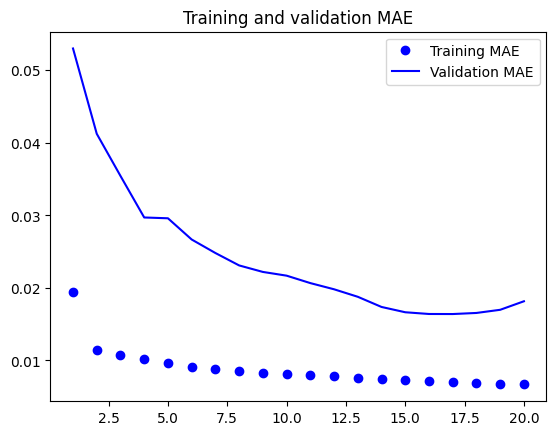

In [12]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

# Looking at the data

In [13]:
pred_dataset = keras.preprocessing.timeseries_dataset_from_array(
                    raw_data[:-delay],
                    targets=close[delay:],
                    sampling_rate=1,
                    sequence_stride=1,
                    sequence_length=180,
                    shuffle=False, # Shouldn't the shuffle be set to 0?
                    seed=33,
                    batch_size=32,
                    start_index=num_train_samples,
                    end_index=num_train_samples + num_val_samples
                    )




2023-04-23 22:55:56.193674: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 100922384 exceeds 10% of free system memory.


In [14]:


predictions = model.predict(pred_dataset)

2023-04-23 22:55:56.439950: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]
2023-04-23 22:55:56.440686: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [170298]
	 [[{{node Placeholder/_8}}]]


   1/5322 [..............................] - ETA: 52:58

2023-04-23 22:55:56.781470: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-23 22:55:56.783297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-23 22:55:56.784811: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

5322/5322 [==============================] - 92s 17ms/step


In [15]:
len(close[num_train_samples+180:num_train_samples + num_val_samples+1])

170298

In [16]:
len(predictions)

170298

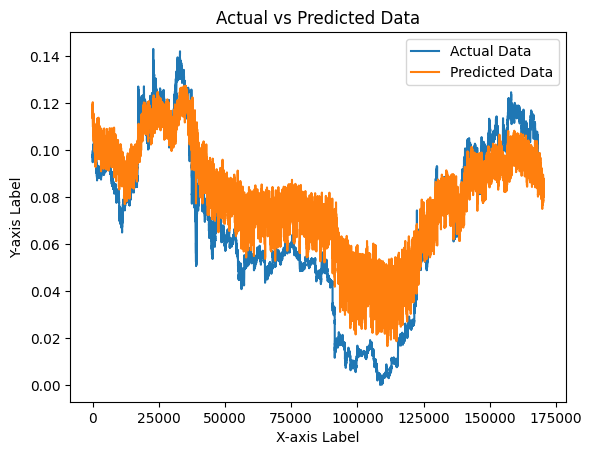

In [17]:
# Generate the predictions using your model and store it in a variable called 'predictions'

# Plot the actual data
plt.plot(range(len(predictions)), close[num_train_samples+180:num_train_samples + num_val_samples+1], label='Actual Data')

# Plot the predicted data
plt.plot(range(len(predictions)), predictions, label='Predicted Data')

# Add labels, title, and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Actual vs Predicted Data')
plt.legend()

# Display the plot
plt.show()

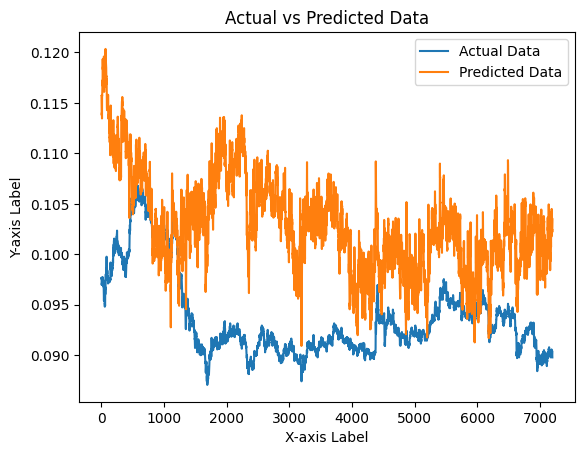

In [18]:
# Generate the predictions using your model and store it in a variable called 'predictions'


actual = close[num_train_samples+180:num_train_samples + num_val_samples+1]

# Plot the actual data
plt.plot(range(len(actual[0:24*5*60])), actual[0:24*5*60], label='Actual Data')

# Plot the predicted data
plt.plot(range(len(actual[0:24*5*60])), predictions[0:24*5*60], label='Predicted Data')

# Add labels, title, and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Actual vs Predicted Data')
plt.legend()

# Display the plot
plt.show()